In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the citipy module.
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | svetlopolyansk
Processing Record 2 of Set 1 | nhulunbuy
Processing Record 3 of Set 1 | ruwi
Processing Record 4 of Set 1 | gotera
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | huangpu
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | itupiranga
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | partyzany
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | punta arenas


Processing Record 39 of Set 4 | brae
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | deming
Processing Record 42 of Set 4 | pangnirtung
Processing Record 43 of Set 4 | madimba
Processing Record 44 of Set 4 | moron
Processing Record 45 of Set 4 | broome
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | saquena
Processing Record 48 of Set 4 | tessalit
Processing Record 49 of Set 4 | nara
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | barcelona
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | kudahuvadhoo
Processing Record 4 of Set 5 | osoyoos
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | venice
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | serenje
Processing Record 12

Processing Record 23 of Set 8 | arys
Processing Record 24 of Set 8 | tigzirt
Processing Record 25 of Set 8 | kilmez
City not found. Skipping...
Processing Record 26 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 27 of Set 8 | bindi
Processing Record 28 of Set 8 | tateyama
Processing Record 29 of Set 8 | bowen
Processing Record 30 of Set 8 | ostersund
Processing Record 31 of Set 8 | polis
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | andenes
Processing Record 35 of Set 8 | ushtobe
Processing Record 36 of Set 8 | burnie
Processing Record 37 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 38 of Set 8 | yulara
Processing Record 39 of Set 8 | santa cruz das palmeiras
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | new richmond
Processing Record 42 of Set 8 | quang ngai
Processing Record 43 of Set 8 | ovre ardal
Processing Record 44 of Set 8 | huarm

Processing Record 11 of Set 12 | chabahar
Processing Record 12 of Set 12 | morondava
Processing Record 13 of Set 12 | paita
Processing Record 14 of Set 12 | sukhobuzimskoye
Processing Record 15 of Set 12 | ventspils
Processing Record 16 of Set 12 | cairns
Processing Record 17 of Set 12 | shihezi
Processing Record 18 of Set 12 | rosario
Processing Record 19 of Set 12 | mus
Processing Record 20 of Set 12 | ketrzyn
Processing Record 21 of Set 12 | mrirt
City not found. Skipping...
Processing Record 22 of Set 12 | havelock
Processing Record 23 of Set 12 | itarema
Processing Record 24 of Set 12 | inyonga
Processing Record 25 of Set 12 | yabrud
Processing Record 26 of Set 12 | guanica
Processing Record 27 of Set 12 | wangkui
Processing Record 28 of Set 12 | zeya
Processing Record 29 of Set 12 | micheweni
Processing Record 30 of Set 12 | nuuk
Processing Record 31 of Set 12 | cotonou
Processing Record 32 of Set 12 | mount isa
Processing Record 33 of Set 12 | eldikan
City not found. Skipping...

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Svetlopolyansk,59.4184,52.3605,22.60,94,26,6.17,RU,2021-11-01 20:42:19
1,Nhulunbuy,-12.2333,136.7667,79.41,94,75,0.00,AU,2021-11-01 20:42:19
2,Ruwi,23.5996,58.5507,76.69,45,0,8.10,OM,2021-11-01 20:42:19
3,Gotera,8.9821,38.7585,52.39,78,53,2.86,ET,2021-11-01 20:42:20
4,Albany,42.6001,-73.9662,54.45,42,17,1.01,US,2021-11-01 20:41:53
5,Naze,28.3667,129.4833,67.98,63,0,14.14,JP,2021-11-01 20:42:21
6,Hermanus,-34.4187,19.2345,55.90,68,5,10.38,ZA,2021-11-01 20:42:21
7,Huangpu,25.4433,113.1747,62.17,98,100,3.49,CN,2021-11-01 20:42:22
8,Busselton,-33.6500,115.3333,50.04,74,100,10.18,AU,2021-11-01 20:42:22
9,Cape Town,-33.9258,18.4232,56.12,77,20,1.01,ZA,2021-11-01 20:39:10


In [27]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Svetlopolyansk,RU,2021-11-01 20:42:19,59.4184,52.3605,22.60,94,26,6.17
1,Nhulunbuy,AU,2021-11-01 20:42:19,-12.2333,136.7667,79.41,94,75,0.00
2,Ruwi,OM,2021-11-01 20:42:19,23.5996,58.5507,76.69,45,0,8.10
3,Gotera,ET,2021-11-01 20:42:20,8.9821,38.7585,52.39,78,53,2.86
4,Albany,US,2021-11-01 20:41:53,42.6001,-73.9662,54.45,42,17,1.01
...,...,...,...,...,...,...,...,...,...
566,Sisimiut,GL,2021-11-01 20:59:12,66.9395,-53.6735,33.33,99,100,8.97
567,Orocue,CO,2021-11-01 20:59:12,4.7912,-71.3354,84.18,68,40,8.48
568,Sassandra,CI,2021-11-01 20:59:13,4.9500,-6.0833,76.50,90,87,5.57
569,Encruzilhada,BR,2021-11-01 20:59:13,-15.5314,-40.9094,72.18,73,100,2.64


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

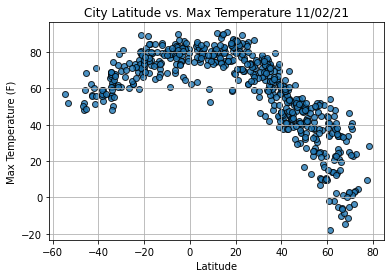

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

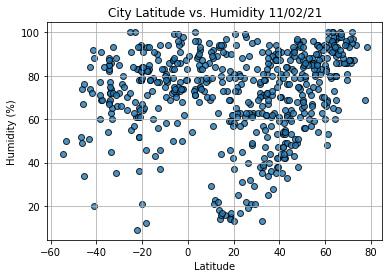

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

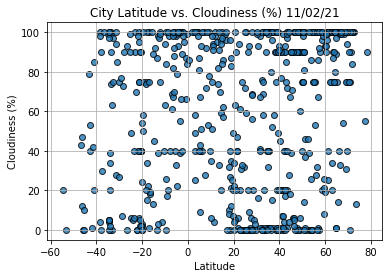

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

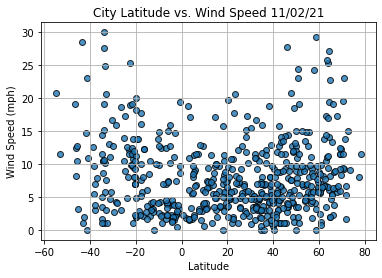

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-11-01 20:42:24
Lat                         -21.2
Lng                        -175.2
Max Temp                    80.76
Humidity                       83
Cloudiness                     75
Wind Speed                   11.5
Name: 13, dtype: object

In [40]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
566     True
567     True
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Svetlopolyansk,RU,2021-11-01 20:42:19,59.4184,52.3605,22.60,94,26,6.17
2,Ruwi,OM,2021-11-01 20:42:19,23.5996,58.5507,76.69,45,0,8.10
3,Gotera,ET,2021-11-01 20:42:20,8.9821,38.7585,52.39,78,53,2.86
4,Albany,US,2021-11-01 20:41:53,42.6001,-73.9662,54.45,42,17,1.01
5,Naze,JP,2021-11-01 20:42:21,28.3667,129.4833,67.98,63,0,14.14


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

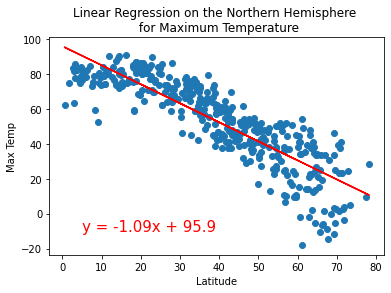

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-10))

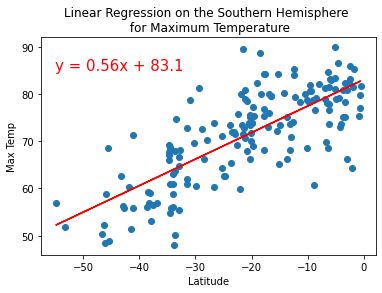

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,85))

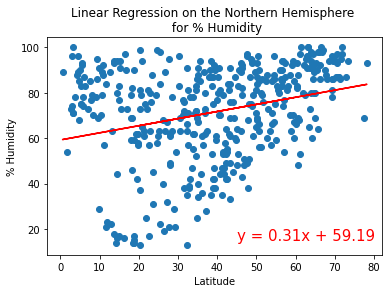

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

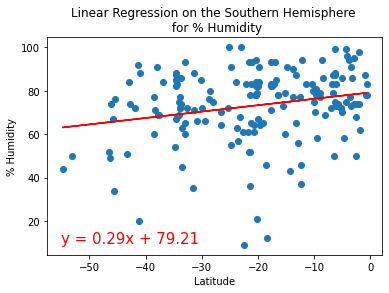

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))

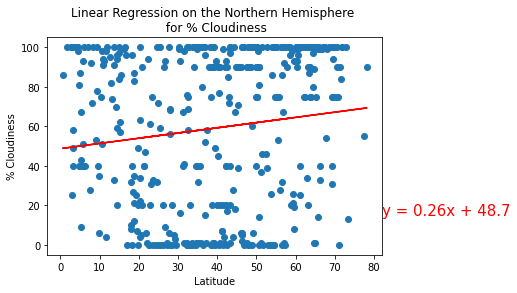

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(82,15))

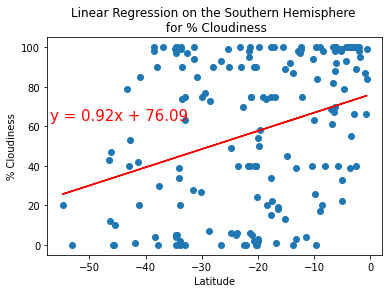

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,63))

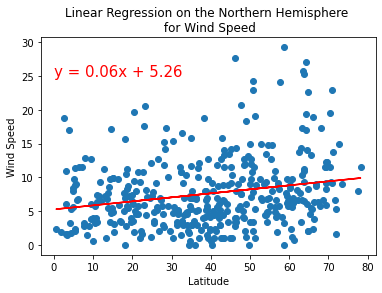

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,25))

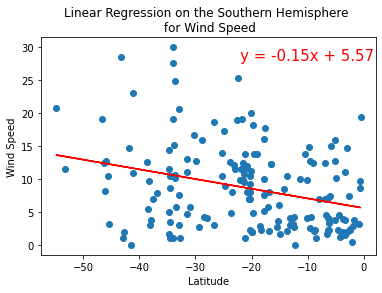

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-22,28))